In [5]:
import os
os.environ["VRE_LOGLEVEL"] = "0"
from vre.readers import MultiTaskDataset
from vre.representations import build_representations_from_cfg, Representation
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from vre_data_analysis import (extract_b64_image_from_fig, histogram_from_classification_task, save_html,
                               extract_pil_from_b64_image, extract_b64_imgsrc_from_fig, gaussian_from_statistics)

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of external failed: Traceback (most recent call last):
  File "/export/home/proiecte/aux/mihai_cristian.pirvu/.conda/envs/ngc/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/export/home/proiecte/aux/mihai_cristian.pirvu/.conda/envs/ngc/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/export/home/proiecte/aux/mihai_cristian.pirvu/.conda/envs/ngc/lib/python3.10/importlib/__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'external'
]


In [6]:
data_path = "/export/home/proiecte/aux/mihai_cristian.pirvu/code/neo-transformers/data/dronescapes-2024/train_set"
import sys
from vre.representations import add_external_representations
from omegaconf import OmegaConf
# sys.path.append("/export/home/proiecte/aux/mihai_cristian.pirvu/code/neo-transformers/readers")
# from dronescapes_representations import dronescapes_task_types
# representations = 
cfg_path = "/export/home/proiecte/aux/mihai_cristian.pirvu/datasets/dronescapes-2024/vre_dronescapes/cfg.yaml"
external_path = "/export/home/proiecte/aux/mihai_cristian.pirvu/code/neo-transformers/readers/semantic_mapper.py:get_new_semantic_mapped_tasks"
representations = build_representations_from_cfg(cfg := OmegaConf.load(cfg_path))
representations = add_external_representations(representations, external_path, cfg)

[2024-11-24T14:00:56 VRE-INFO] Building 'depth/marigold' (vre name: depth_marigold) (build_representations.py:build_representation_from_cfg:81)
[2024-11-24T14:00:56 VRE-INFO] Building 'semantic-segmentation/mask2former' (vre name: semantic_mask2former_mapillary_49189528_0) (build_representations.py:build_representation_from_cfg:81)
[2024-11-24T14:00:56 VRE-INFO] Building 'semantic-segmentation/mask2former' (vre name: semantic_mask2former_coco_47429163_0) (build_representations.py:build_representation_from_cfg:81)
[2024-11-24T14:00:56 VRE-INFO] Building 'optical-flow/rife' (vre name: opticalflow_rife) (build_representations.py:build_representation_from_cfg:81)
[2024-11-24T14:00:56 VRE-INFO] Building 'default/rgb' (vre name: rgb) (build_representations.py:build_representation_from_cfg:81)
[2024-11-24T14:00:56 VRE-INFO] Building 'normals/depth-svd' (vre name: normals_svd(depth_marigold)) (build_representations.py:build_representation_from_cfg:81)


[2024-11-24T14:00:56 VRE-INFO] Adding ['semantic_mask2former_swin_mapillary_converted', 'semantic_mask2former_swin_coco_converted', 'buildings', 'living-vs-non-living', 'sky-and-water', 'transportation', 'containing', 'vegetation', 'buildings(nearby)', 'safe-landing-no-sseg', 'safe-landing-semantics'] from /export/home/proiecte/aux/mihai_cristian.pirvu/code/neo-transformers/readers/semantic_mapper.py (build_representations.py:add_external_representations:157)


In [7]:
print(representations)
reader = MultiTaskDataset(data_path, task_names=list(representations), task_types=representations,
                          normalization="min_max")
print(reader)
print(reader[0])

{'rgb': RGB(rgb), 'opticalflow_rife': FlowRife(opticalflow_rife), 'semantic_mask2former_coco_47429163_0': Mask2Former(semantic_mask2former_coco_47429163_0), 'semantic_mask2former_mapillary_49189528_0': Mask2Former(semantic_mask2former_mapillary_49189528_0), 'depth_marigold': Marigold(depth_marigold), 'semantic_mask2former_swin_coco_converted': SemanticMask2FormerCOCOConverted(semantic_mask2former_swin_coco_converted ['semantic_mask2former_coco_47429163_0']), 'semantic_mask2former_swin_mapillary_converted': SemanticMask2FormerMapillaryConvertedPaper(semantic_mask2former_swin_mapillary_converted ['semantic_mask2former_mapillary_49189528_0']), 'buildings': BinaryMapper(buildings ['semantic_mask2former_mapillary_49189528_0', 'semantic_mask2former_coco_47429163_0']), 'living-vs-non-living': BinaryMapper(living-vs-non-living ['semantic_mask2former_mapillary_49189528_0', 'semantic_mask2former_coco_47429163_0']), 'sky-and-water': BinaryMapper(sky-and-water ['semantic_mask2former_mapillary_4918

[2024-11-24T14:00:59 VRE-INFO] Tasks used in this dataset: ['buildings', 'buildings(nearby)', 'containing', 'depth_marigold', 'living-vs-non-living', 'normals_svd(depth_marigold)', 'opticalflow_rife', 'rgb', 'safe-landing-no-sseg', 'safe-landing-semantics', 'semantic_mask2former_coco_47429163_0', 'semantic_mask2former_mapillary_49189528_0', 'semantic_mask2former_swin_coco_converted', 'semantic_mask2former_swin_mapillary_converted', 'sky-and-water', 'transportation', 'vegetation'] (multitask_dataset.py:__init__:85)
[2024-11-24T14:00:59 VRE-INFO] Loaded task statistics: {'softseg_gb': (3,), 'rgb': (3,), 'normals_sfm_manual202204': (3,), 'edges_gb': (1,), 'semantic_segprop8': (8,), 'edges_dexined': (1,), 'hsv': (3,), 'opticalflow_rife': (2,), 'depth_sfm_manual202204': (1,), 'depth_ufo': (1,), 'depth_dpt': (1,), 'depth_marigold': (1,), 'normals_svd(depth_marigold)': (3,)} from /export/home/proiecte/aux/mihai_cristian.pirvu/code/neo-transformers/data/dronescapes-2024/train_set/.task_statist

[MultiTaskDataset]
 - Path: '/export/home/proiecte/aux/mihai_cristian.pirvu/code/neo-transformers/data/dronescapes-2024/train_set'
 - Tasks (17): [BinaryMapper(buildings ['buildings']), BuildingsFromM2FDepth(buildings(nearby) ['buildings(nearby)']), BinaryMapper(containing ['containing']), Marigold(depth_marigold ['depth_marigold']), BinaryMapper(living-vs-non-living ['living-vs-non-living']), DepthNormalsSVD(normals_svd(depth_marigold) ['normals_svd(depth_marigold)']), FlowRife(opticalflow_rife ['opticalflow_rife']), RGB(rgb ['rgb']), SafeLandingAreas(safe-landing-no-sseg ['safe-landing-no-sseg']), SafeLandingAreas(safe-landing-semantics ['safe-landing-semantics']), Mask2Former(semantic_mask2former_coco_47429163_0 ['semantic_mask2former_coco_47429163_0']), Mask2Former(semantic_mask2former_mapillary_49189528_0 ['semantic_mask2former_mapillary_49189528_0']), SemanticMask2FormerCOCOConverted(semantic_mask2former_swin_coco_converted ['semantic_mask2former_swin_coco_converted']), SemanticM

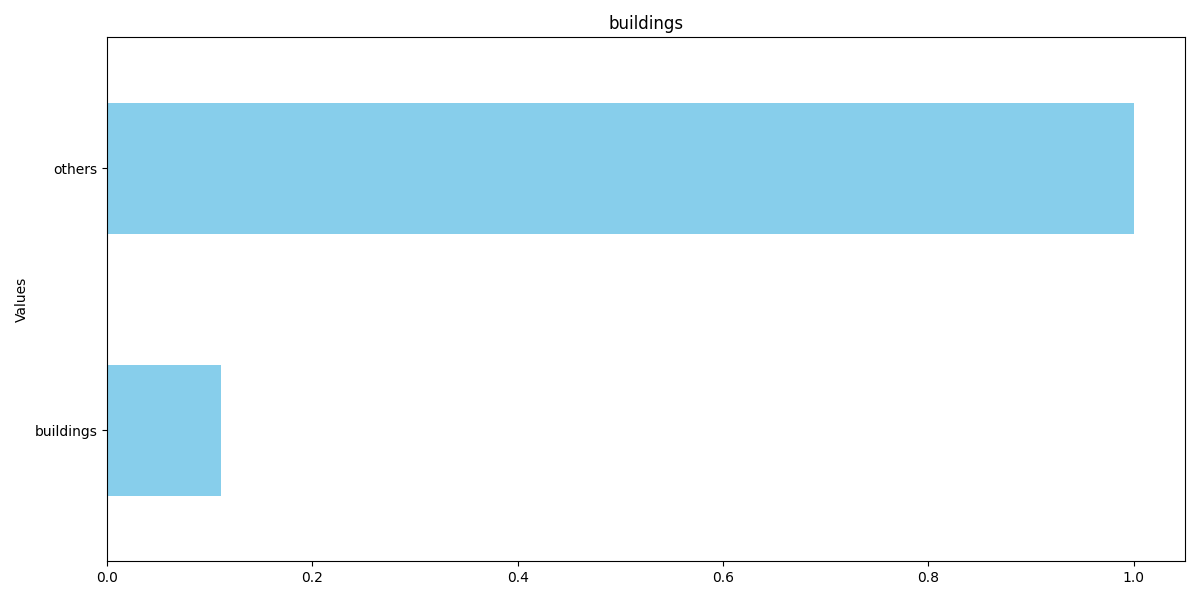

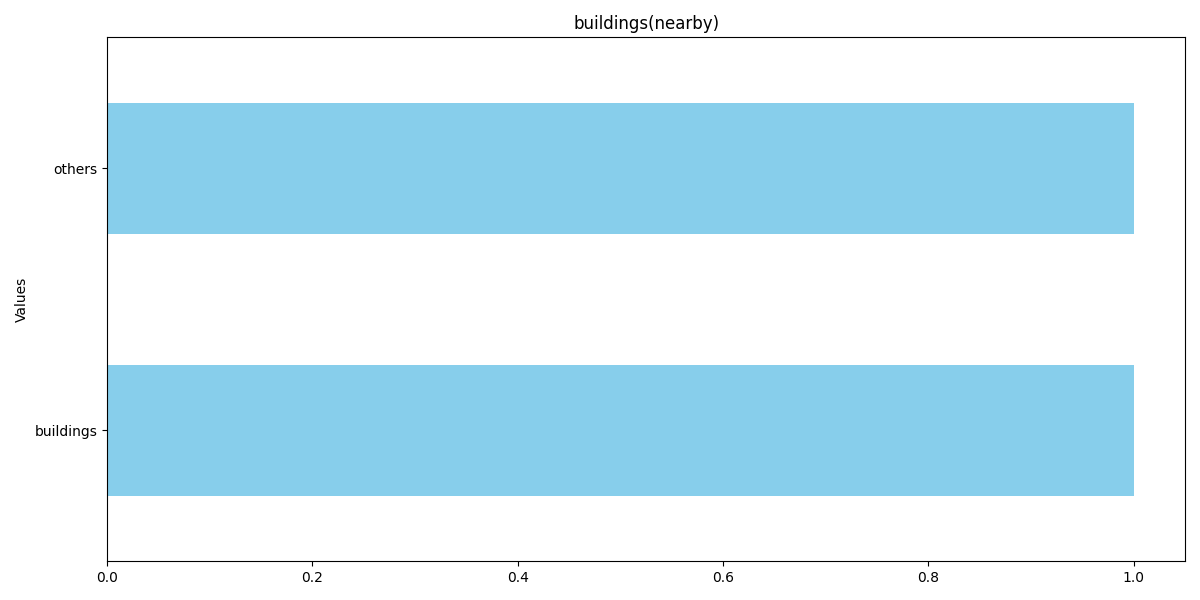

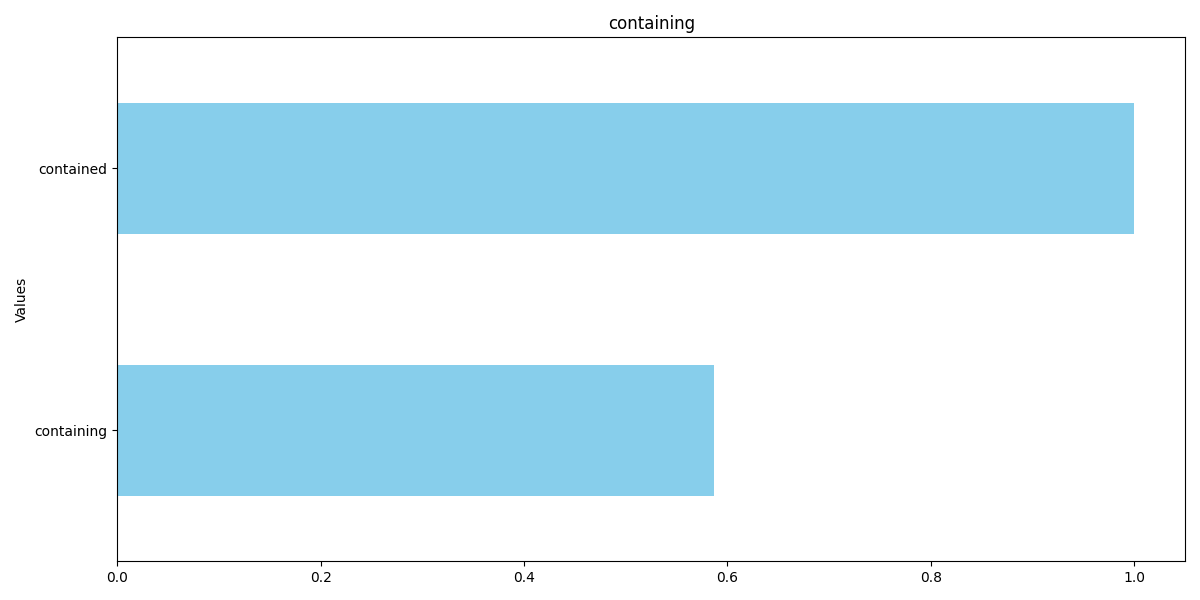

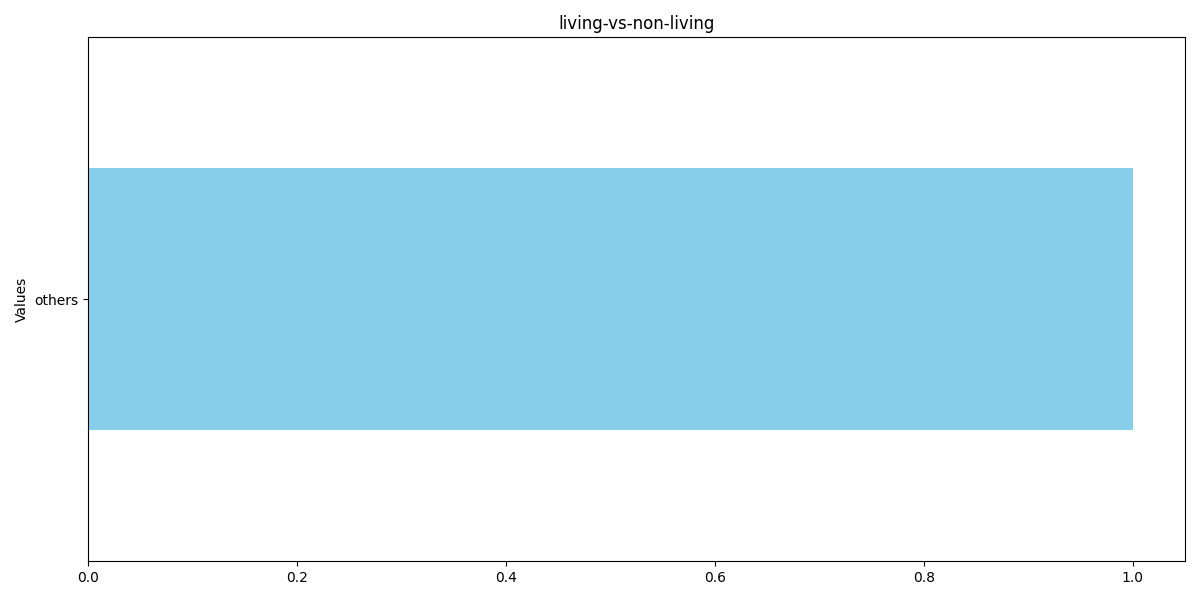

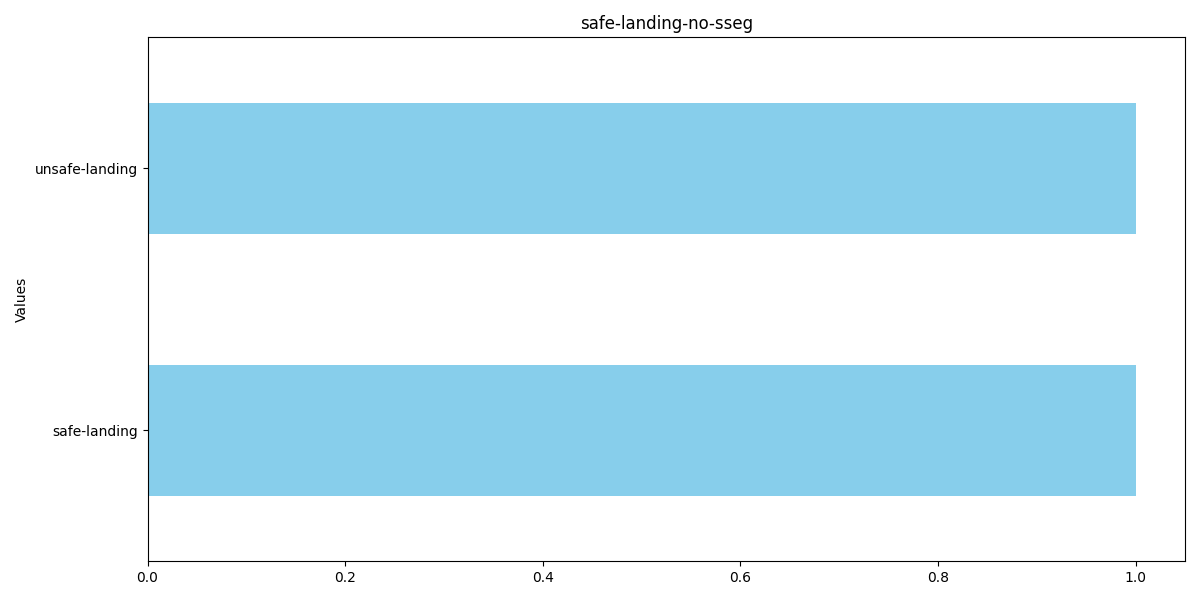

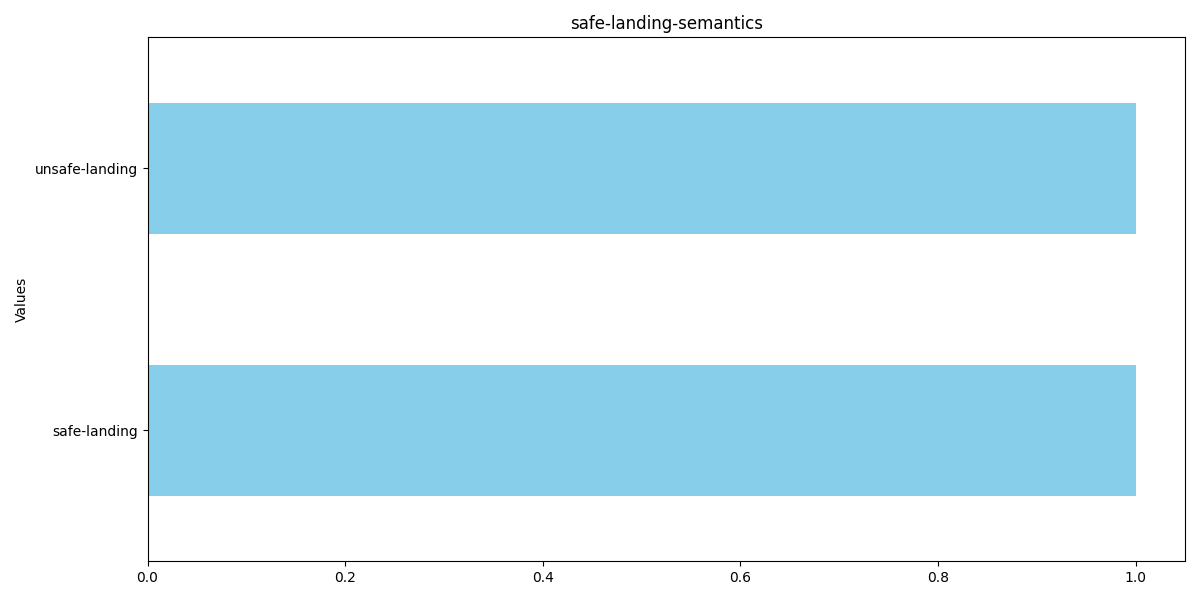

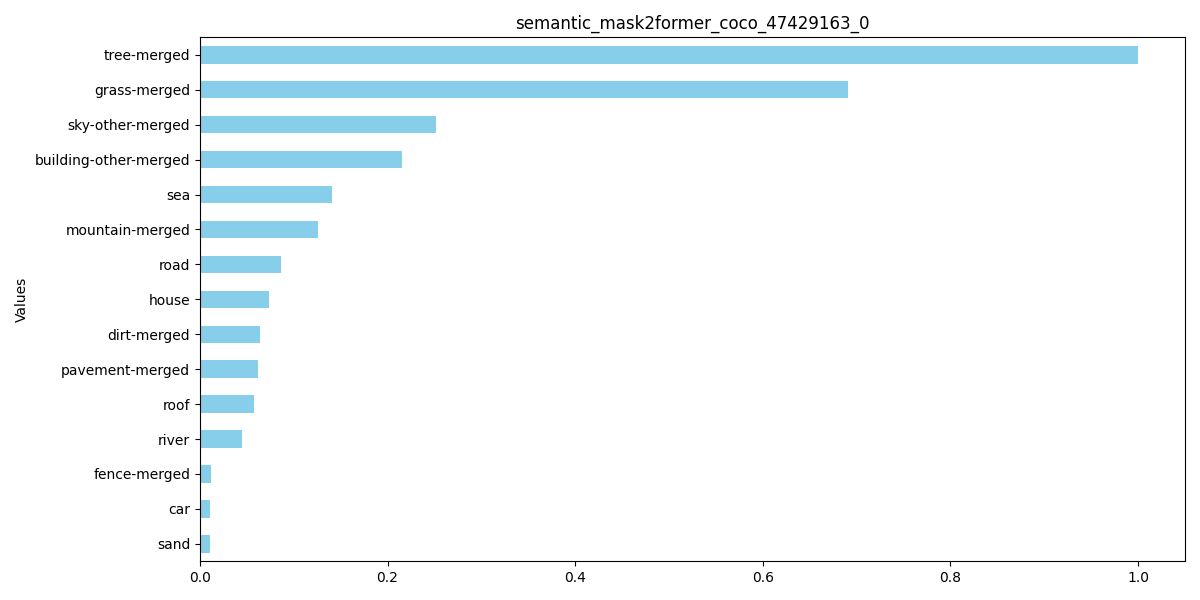

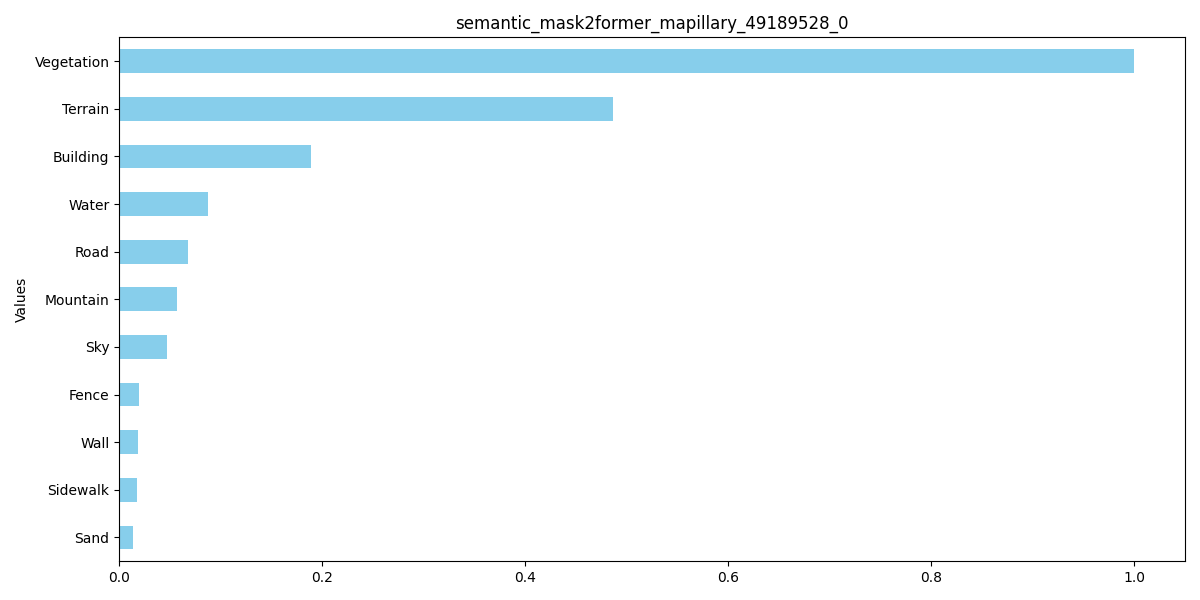

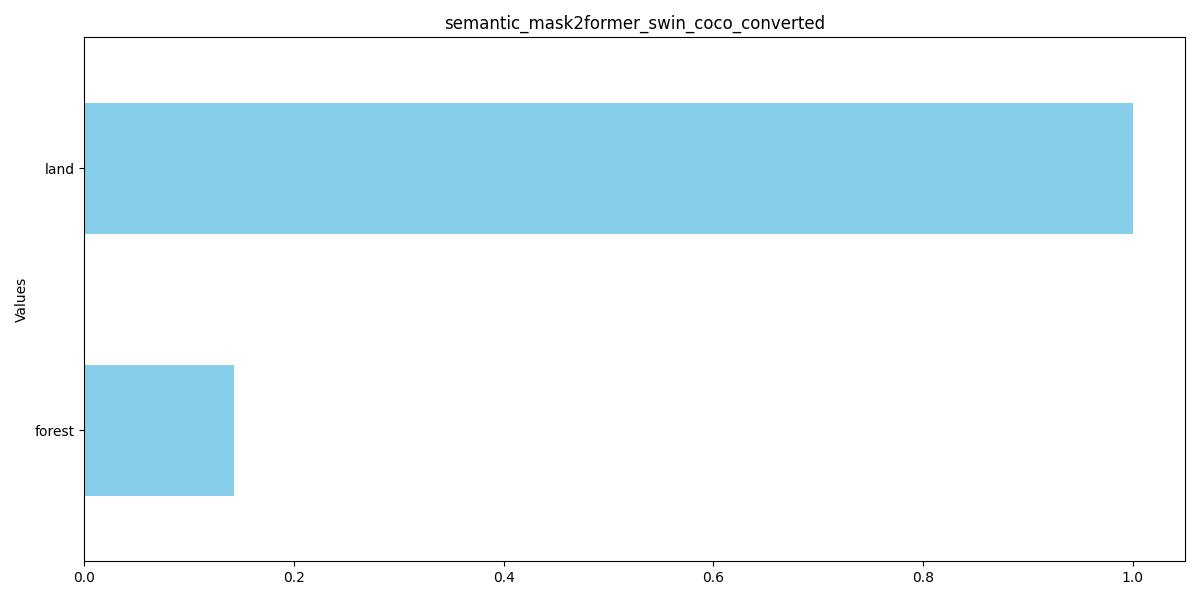

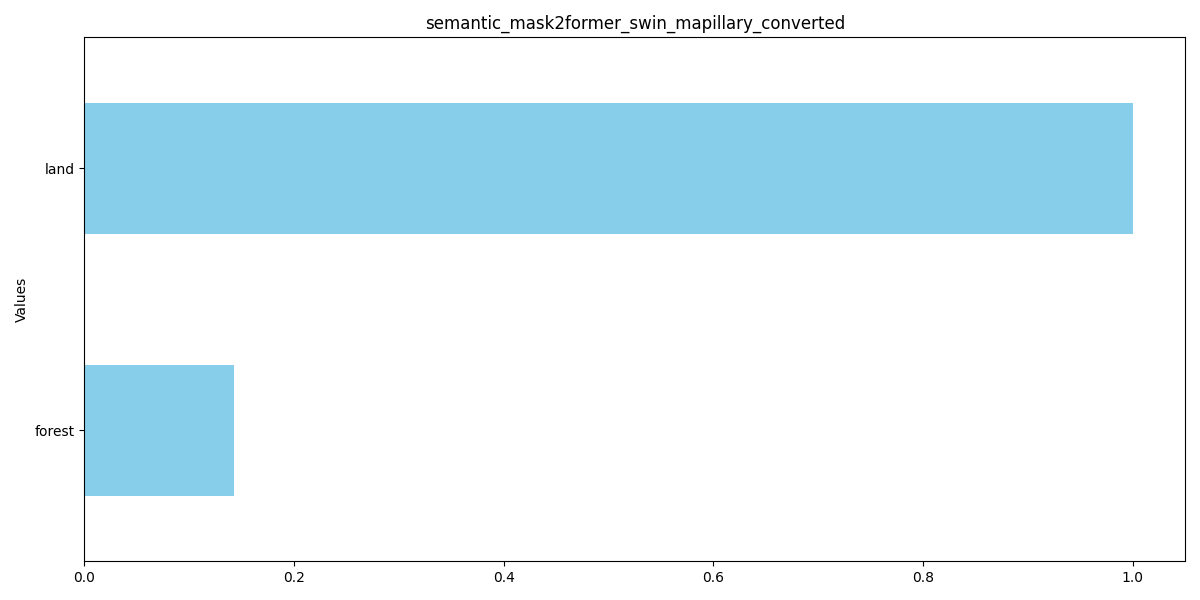

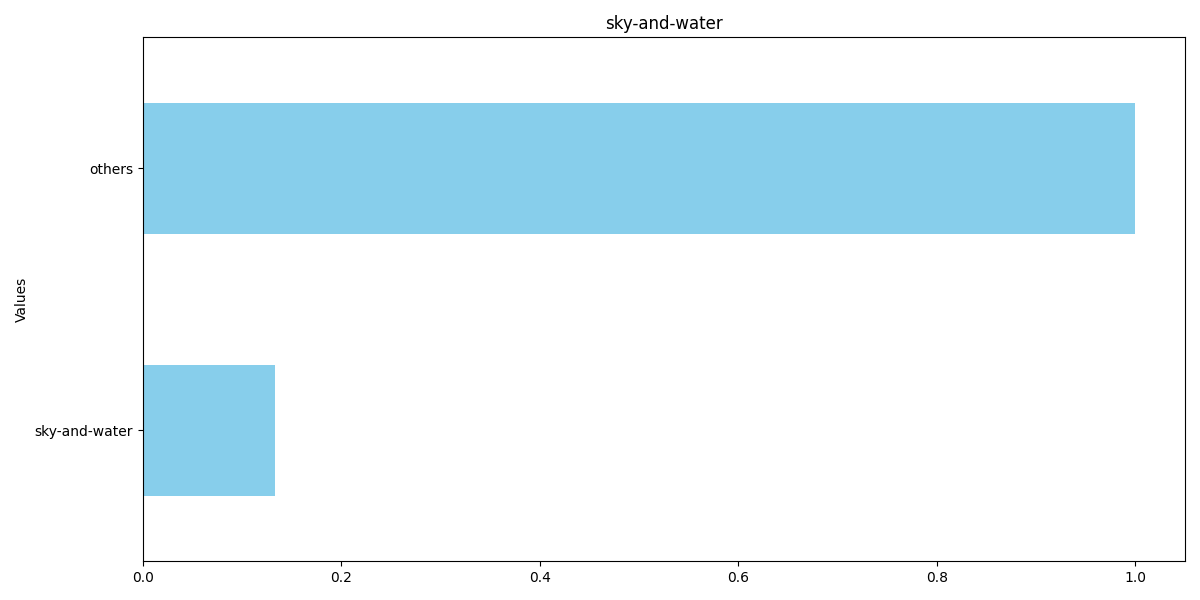

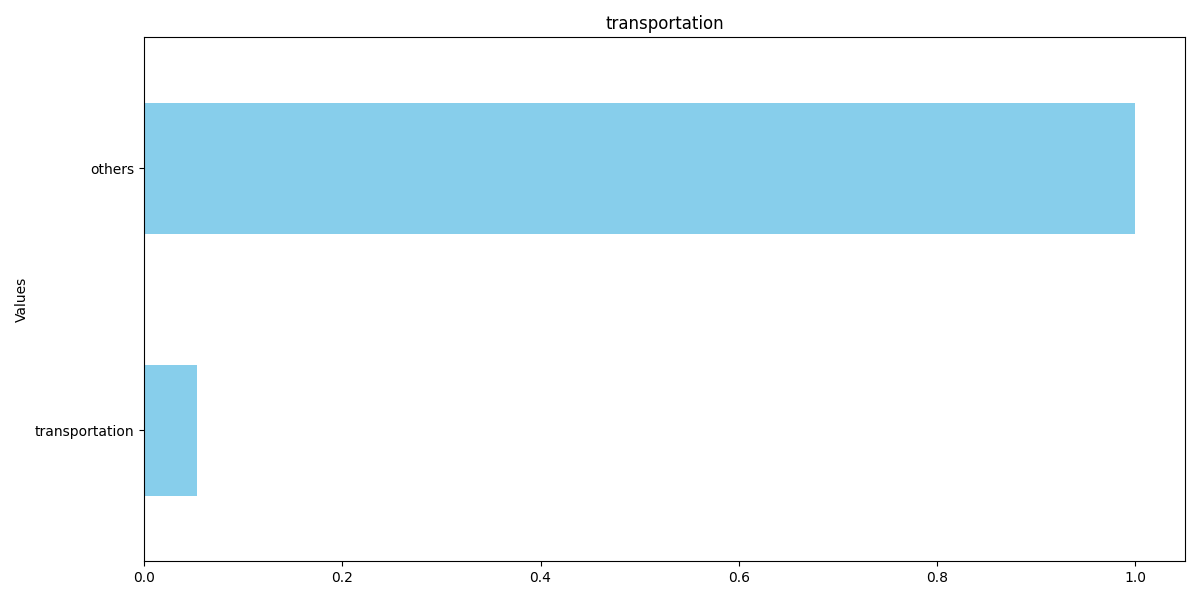

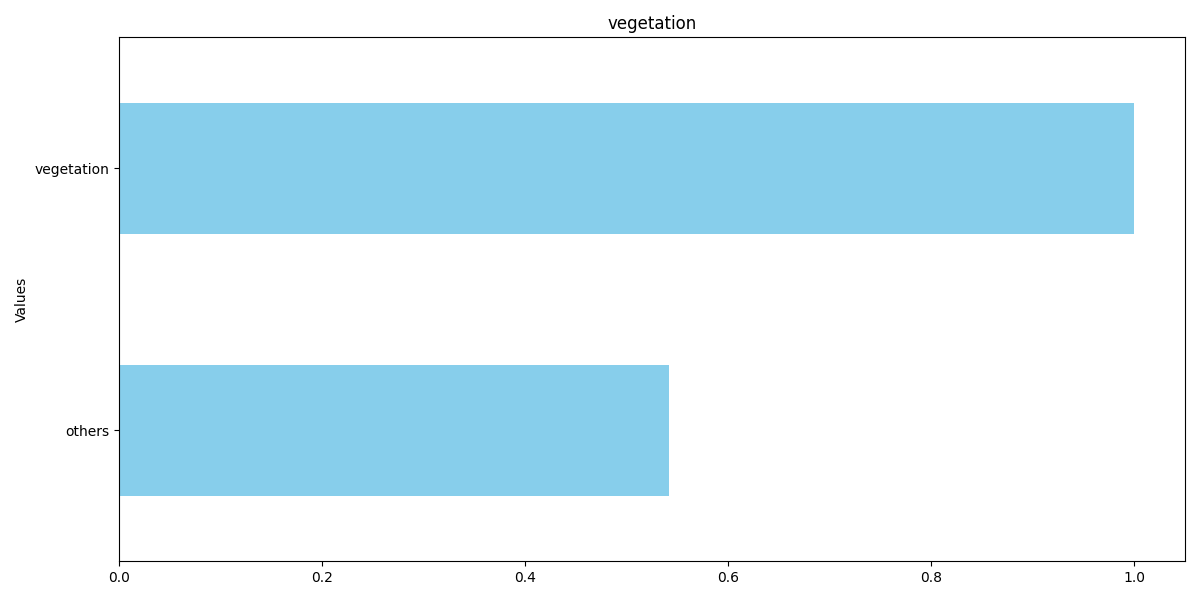

In [8]:
imgsrcs = []
for classif_task in reader.classification_tasks:
    fig = histogram_from_classification_task(reader, classif_task, n=100, mode="random")
    display(extract_pil_from_b64_image(extract_b64_image_from_fig(fig)))
    imgsrcs.append(extract_b64_imgsrc_from_fig(fig))

[autoreload of external failed: Traceback (most recent call last):
  File "/export/home/proiecte/aux/mihai_cristian.pirvu/.conda/envs/ngc/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/export/home/proiecte/aux/mihai_cristian.pirvu/.conda/envs/ngc/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/export/home/proiecte/aux/mihai_cristian.pirvu/.conda/envs/ngc/lib/python3.10/importlib/__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'external'
]


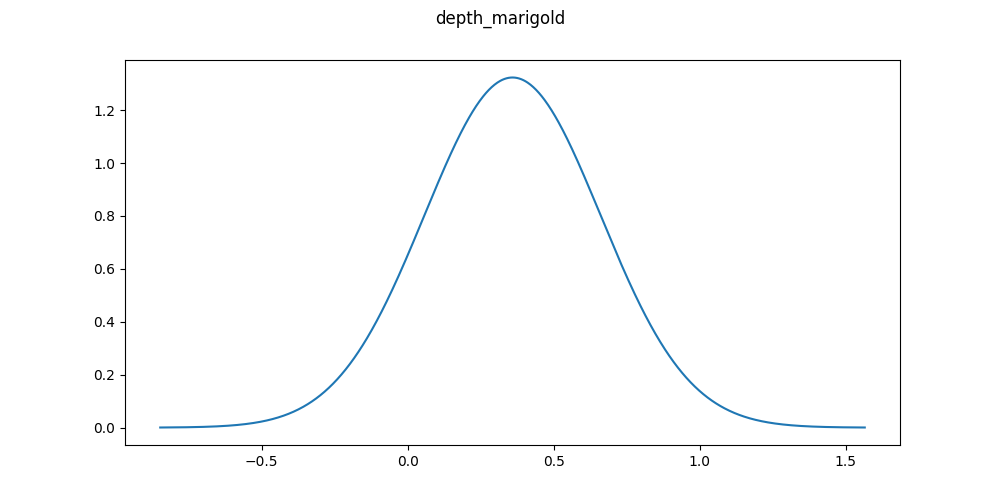

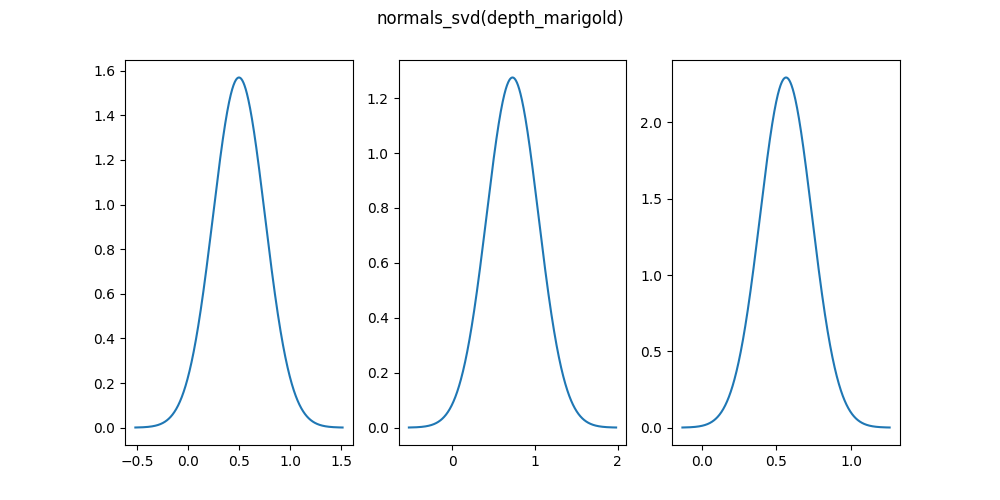

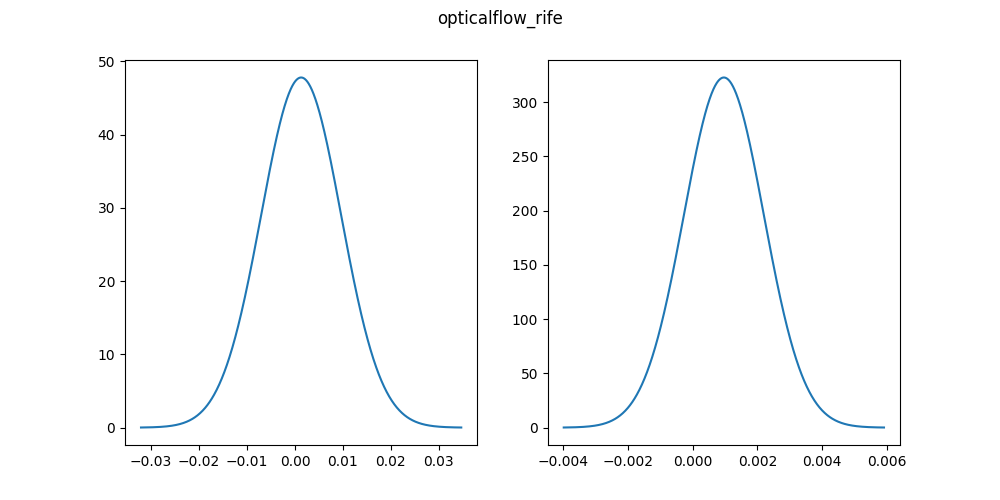

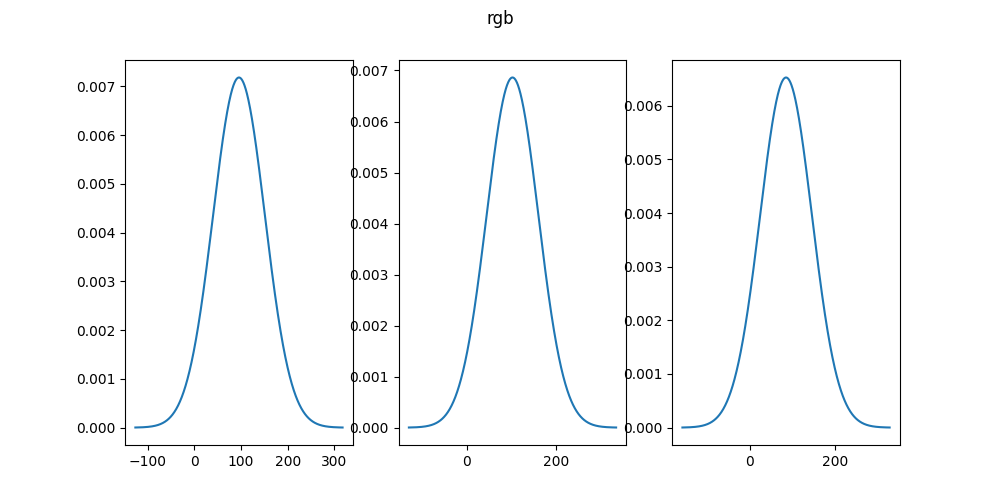

FeatureNotFound: Couldn't find a tree builder with the features you requested: lxml. Do you need to install a parser library?

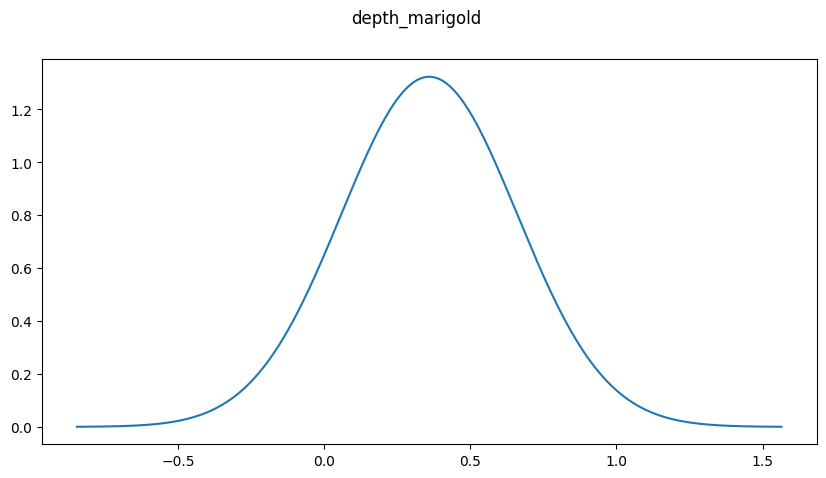

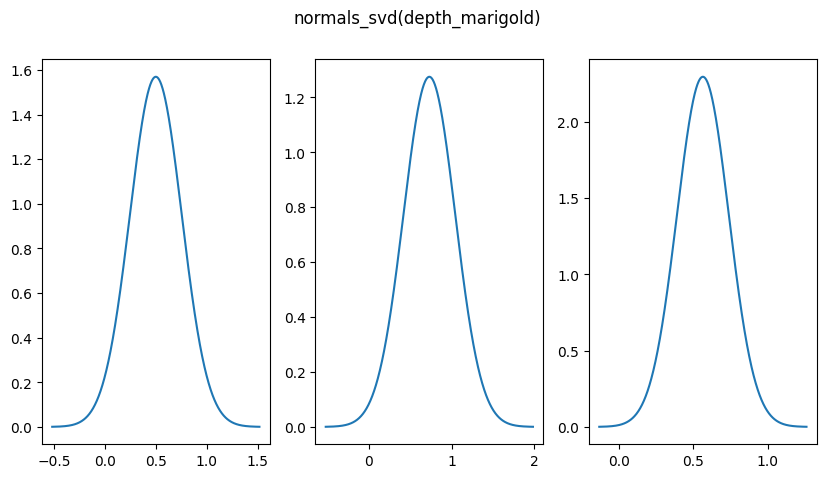

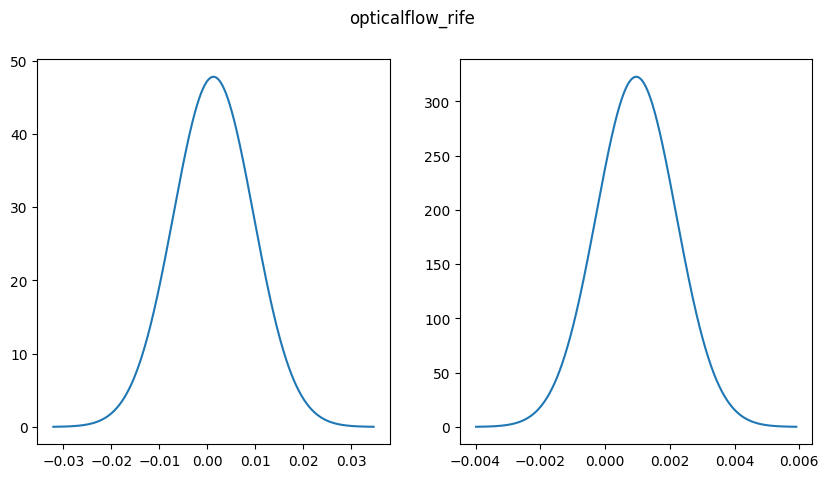

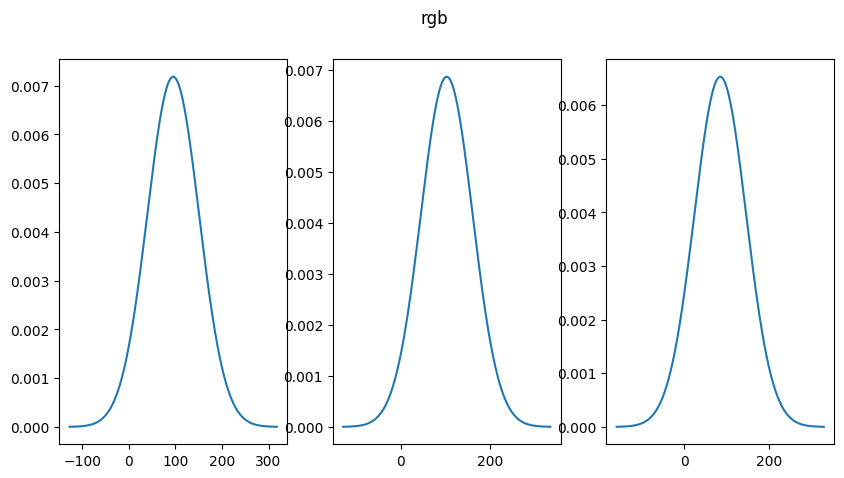

In [9]:

regression_tasks = [t for t in reader.tasks if t not in reader.classification_tasks]
for regression_task in regression_tasks:
    fig = gaussian_from_statistics(reader, regression_task)
    display(extract_pil_from_b64_image(extract_b64_image_from_fig(fig)))
    imgsrcs.append(extract_b64_imgsrc_from_fig(fig))

save_html(imgsrcs, str(reader), "plot.html")
